# MODIS spatial autocorrelation



Calculate a Moran correlogram for EVI from MODIS data in one 10 km square.

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix

In [2]:
# Import MODIS data for one square
sq1 =pd.read_csv("../data/modis_pasture_A2018_square1.csv")

In [10]:
# Distance bins
dist_bins = np.array([200, 1000, 2000, 3000, 4000, 5000, 6000,7000, 8000])

# Moran's I array
moran_I = np.zeros(dist_bins.shape)

# Number of pairs of points per distance class
n_obs = np.zeros(dist_bins.shape)

In [11]:
# Calculate distances between pairs of pixels
xy_pairs = sq1.iloc[:,0:2]
dist_pairwise = distance_matrix(xy_pairs, xy_pairs,2)

In [12]:
# Calculate Moran's I for each distance class
for i in range(len(dist_bins)):
    # Find pairs of points in the distance class
    if (i+1==len(dist_bins)):
      ind = np.where(dist_pairwise>=dist_bins[i])
    else:
      ind = np.where((dist_pairwise>=dist_bins[i]) & (dist_pairwise<dist_bins[i+1]))

    # Moran's I
    moran_I[i] = np.corrcoef(sq1.evi[ind[0]], sq1.evi[ind[1]])[0,1]
    
    # Number of pairs of points in distance class
    n_obs[i] = len(ind[0])
        
    

Text(0.5,1,'Moran Correlogram')

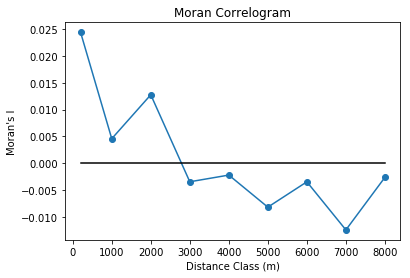

In [13]:
plt.plot(dist_bins, moran_I,'-o')
plt.plot(dist_bins, np.zeros(dist_bins.shape),'-k')
plt.xlabel('Distance Class (m)')
plt.ylabel('Moran\'s I')
plt.title('Moran Correlogram')

Text(0,0.5,'Number of pairs of points')

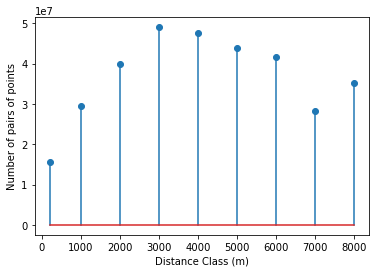

In [14]:
plt.stem(dist_bins, n_obs)
plt.xlabel('Distance Class (m)')
plt.ylabel('Number of pairs of points')